In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Load the fashion mnist dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [13]:
train_images.shape
type(train_images)

numpy.ndarray

In [14]:
#To see what a pixel looks like

train_images[0, 23, 23]
print(train_images[0:2])

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [15]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [16]:
# State the label in words

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

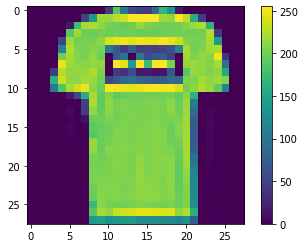

In [17]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

Data Preprocessing

In [18]:
# To scale the pixel values to be between 0 and 1, we must divide by 255.0
train_images = train_images/255.

test_images = test_images/255.

Building the Model

In [20]:
# A sequential model is a feedforward neural network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28, 28)), #the input layer consists of 784 neurons flattened from the image shape
                          keras.layers.Dense(256, activation= 'relu'),  #an hidden layer with 256 neurons that will be fully connected to each neuron from the previous layer
                          keras.layers.Dense(128, activation= 'relu'),  #an hidden layer with 128 neurons that will be fully connected to each neuron from the previous layer
                          keras.layers.Dense(10, activation= 'softmax') #the output layer with 10 neurons that will be fully connected to each neuron from the previous layer
])

Compile the Model

In [21]:
model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [24]:
model.fit(train_images, train_labels, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2189 - accuracy: 0.9175
Epoch 2/2
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2085 - accuracy: 0.9202


In [25]:
#Evaluate the Model

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose= 2)

test_accuracy = test_acc
print('Test accuracy', test_accuracy)

313/313 - 1s - loss: 0.3558 - accuracy: 0.8876 - 536ms/epoch - 2ms/step
Test accuracy 0.8876000046730042


Making Predictions

In [27]:
predictions = model.predict(test_images)

In [28]:
predictions[0]

array([2.23758789e-08, 1.13466836e-08, 1.69523950e-08, 5.76761039e-08,
       2.35367096e-07, 5.47473574e-05, 4.37593428e-07, 1.41983805e-02,
       3.58253203e-07, 9.85745788e-01], dtype=float32)

In [30]:
np.argmax(predictions[0])

9

In [31]:
test_images.shape

(10000, 28, 28)

In [35]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

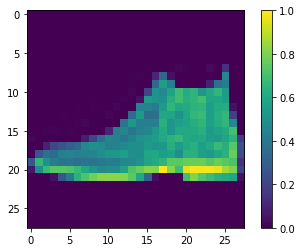

Orginal label: Ankle boot
Predicted: Ankle boot


In [42]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
print('Orginal label:', class_names[test_labels[0]])
print('Predicted:', class_names[np.argmax(predictions[0])])

Verifying Predictions

Pick a number: 54


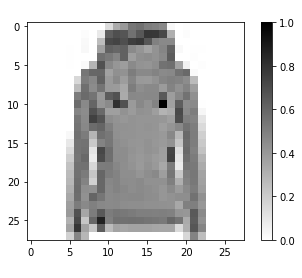

In [46]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR


def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Expected :" + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")
  
num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)